Compare the performance of built in determinant calculation function and a function built using for loop:

   det_using_builtin  det_using_for itermethod
0           0.592035       0.539425          8
1           5.190415       4.872520          9
2          49.417866      49.948059         10


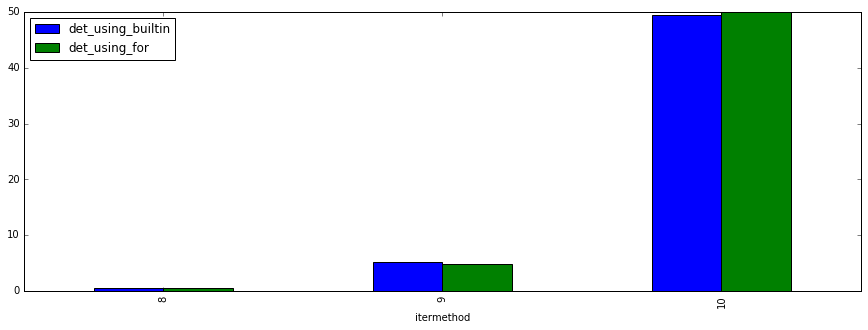

In [1]:
from copy import deepcopy
import math
import time
import numpy as np

# Function to calculate determinant using for loop:
def det_using_for(X):
    term_list = []
    if len(X)>2: #Check if the determinant has larger than 2x2
        for j in xrange(0,len(X)):
            new_x = deepcopy(X)
            XY= np.delete(new_x,0,0) # Remove the first row
            YZ = np.delete(XY,j,1) # Remove the jth column
            multiplier = X[0][j] * math.pow(-1,(2+j)) # Calculate the multiplier
            det = det_using_for(YZ) # call det_using_for recursively to calculate det
            term_list.append(multiplier*det)
        return sum(term_list)
    else:
        return(X[0][0]*X[1][1] - X[0][1]*X[1][0])
    

# Function to calculate determinant using builtin function
def det_using_builtin(X):
    return np.linalg.det(X)


# Define size of each matrix
size = [8,9,10]

# Calculate time taken for determinant calculation using 'for loop method'
det_method1 = []
det_iter_method1 =[]
for i in size:
    t1=time.time()
    X = np.random.uniform(size = (i,i))
    det_using_for(X)
    t2=time.time()
    det_method1.append(t2-t1)
    det_iter_method1.append(str(i))
    

# Calculate the time taken for determinant calculation using 'built in function'
det_method2 = []
for i in size:
    t3=time.time()
    X = np.random.uniform(size = (i,i))
    det_using_for(X)
    t4=time.time()
    det_method2.append(t4-t3)
     
        
# Plot the graphs to show time taken using each method of determinant calculation
import matplotlib
%matplotlib inline
import pandas as pd

data_to_plot_det = {'itermethod':det_iter_method1,
                    'det_using_for': det_method1,
                    'det_using_builtin': det_method2}
data_to_plot_det2 = pd.DataFrame(data_to_plot_det)

print data_to_plot_det2

data_to_plot_det2.plot(kind='bar', x = 'itermethod', figsize=(15,5))